Question 02: [40 Marks]: Mahalanobis Distance

Given the covariance matrix, Σ =[[3/2,1/2],[1/2,3/2]],
μ = [0 , 0] sample random points from the multivariate normal distribution and use it as a set of datapoints (say X).

In [ ]:
import numpy as np
import pandas as pd
cov=[[3/2,1/2],[1/2,3/2]]
mean=[0,0]

X=np.random.multivariate_normal(mean,cov,1000)
X


array([[ 0.27742266,  1.63624414],
       [-0.68725996, -0.71503826],
       [ 0.7776113 ,  0.11288368],
       ...,
       [-0.00713058, -0.59235425],
       [-2.70220357, -0.51638752],
       [ 2.15333705,  1.11063908]])

1. Calculate the covariance matrix of the sample X , say Σ . Find the eigenvectors and eigenvalues of Σ and plot it superimposed on the datapoints X. [5 marks]

Eigenvalues: [1.91212319 0.98069388]
Eigenvectors: [[ 0.719127   -0.69487867]
 [ 0.69487867  0.719127  ]]


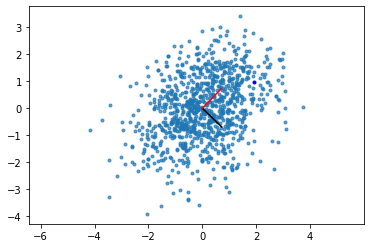

[[1.4623766216486032, 0.4654408208876955],
 [0.4654408208876955, 1.430440443561338]]

In [ ]:

import matplotlib.pyplot as plt

a,b=X.shape

cov=[[0,0],[0,0]]

for i in range(b):
  exp_i=np.sum(X[:,i])/a

  for j in range(b):
    exp_j=np.sum(X[:,j])/a

    cov[i][j]=np.sum((X[:,i]-exp_i)*(X[:, j]-exp_j))/(a-1)


# Finding  the eigenvectors and eigenvalues of the covariance matrix

eigen_vals, eigen_vecs = np.linalg.eig(cov)

print("Eigenvalues:", eigen_vals)
print("Eigenvectors:", eigen_vecs)

# the plot has been displayed below for super imposed of data points and eigen values and eigen vectors

plt.plot(X[:, 0], X[:, 1], '.', alpha=0.7)

plt.plot(eigen_vals[0], eigen_vals[1], '.', color='blue')

plt.plot([0, eigen_vecs[0, 0]], [0, eigen_vecs[0, 1]], color='black')

plt.plot([0, eigen_vecs[1, 0]], [0, eigen_vecs[1, 1]], color='red')

plt.axis('equal')

plt.show()

cov


2. Perform the transformation Y = Σ on the datapoints X. Calculate the covariance matrix of transformed datapoints Y , say Σ . Comment on the obtained covariance matrix and infer what was the purpose of the transformation.[10 marks]

In [ ]:
import scipy.linalg as sp
# now we need to perform the inverse and then square root of the values then we will multiply X to the result to obtain matrix Y

#the inverse matrix can be obtained using the library 

cov_inverse=np.linalg.inv(cov)
cov_inv_sqrt=sp.sqrtm(cov_inverse)

arr_cov = np.array(cov_inv_sqrt)

Y=np.dot(X,arr_cov)
Y

array([[ 0.00466491,  1.38608498],
       [-0.48970998, -0.52464857],
       [ 0.65379874, -0.01300828],
       ...,
       [ 0.07869757, -0.51515484],
       [-2.25417747, -0.06295063],
       [ 1.69617762,  0.65939252]])

3. Uniformly sample 10 points on the curve x . Let these set of points be called . Plot points in P along with the datapoints in X. Make sure to give each point a different color [Hint : You can use properties like hue to do this] for better visualization. Report the eucledian
distance of each point from μ using barplot. [10 marks]

<ipython-input-22-c817229b97ce>:6: RuntimeWarning: invalid value encountered in sqrt
  y=np.sqrt(25 - x**2)


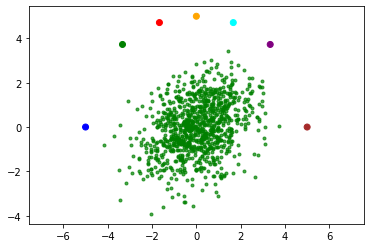

In [ ]:
# now here we have to calculate 10 sample points from the curve and store it in an array

# we can define a fucntion which takes the input value of x and retrns the value of y

def circular_curve(x):
  y=np.sqrt(25 - x**2)
  return y

x=np.linspace(-5,10,num=10)
y=circular_curve(x)

#here we create a vertical stack which will store the x and y entries as 2 columns and 10 rows
P = np.vstack((x, y)).T

colors = [ 'blue','green','red','orange','cyan','purple','brown','olive','pink','gray']

plt.plot(X[:, 0], X[:, 1], '.',color='green', alpha=0.7)

plt.scatter(P[:,0], P[:,1],c=colors) 
plt.axis('equal')
plt.show()


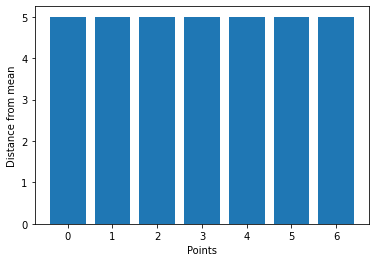

In [ ]:
euclidean_distance = np.sqrt(np.sum((P - mean)**2, axis=1))

plt.bar(np.arange(P.shape[0]), euclidean_distance)
plt.xlabel('Points')
plt.ylabel('Distance from mean')
plt.show()

4. Perform the transformation Q = Σ on the datapoints P. Calculate the eucledian distance of transformed datapoints Q from μ and report it using barplot . Plot points in Q along with datapoints in Y. Make sure that the color of point before and transformation doesn’t change.Comment on the difference in eucledian distance before and after transformations of the
points in P.   [15 marks]

[[-4.30785098  0.71613455]
 [-3.40567583  3.72493051]
 [-2.11112845  4.34651965]
 [-0.71613455  4.35698848]
 [ 0.7607722   3.86909662]
 [ 2.33812547  2.77008444]
 [ 4.30785098 -0.71613455]
 [        nan         nan]
 [        nan         nan]
 [        nan         nan]]
[4.3669702  5.04715119 4.83209027 4.41544984 3.94318183 3.62494118
 4.3669702         nan        nan        nan]


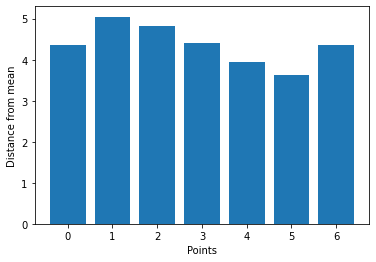

In [ ]:
Q=np.dot(P,arr_cov)

print(Q)
euclidean_distance2 = np.sqrt(np.sum((Q - mean)**2, axis=1))
print(euclidean_distance2)

plt.bar(np.arange(Q.shape[0]), euclidean_distance2)
plt.xlabel('Points')
plt.ylabel('Distance from mean')
plt.show()

Question 01: [60 marks] : Gaussian Bayes Classifier
Dataset : Iris Dataset. Preprocess the dataset, and also perform exploratory analysis. Split the data
into training and testing dataset in the ratio 70:30.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df=pd.read_csv('Iris.csv')

df=df.drop(['Id'],axis=1)
df=df.drop(['SepalLengthCm'],axis=1)
df=df.drop(['SepalWidthCm'],axis=1)

df=df.dropna()


from sklearn.preprocessing import LabelEncoder 

le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])


# now in order to split to test train and validation sets first we need to convert into x and y numpy arrays
# creating X and Y numpy arrays to pass into tts

Y=df.Species.to_numpy().astype('int')

X_data = df.drop(columns=["Species"])
X = X_data.to_numpy()   

# splitting the data into test and train 

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)


print("length of dataframe : ", len(df))
print("length of training set : ", len(x_train))
print("length of test set: ", len(x_test))

# now we perform the exploratory analysis

print(df.describe())
print(df['Species'].nunique())

length of dataframe :  150
length of training set :  105
length of test set:  45
       PetalLengthCm  PetalWidthCm     Species
count     150.000000    150.000000  150.000000
mean        3.758667      1.198667    1.000000
std         1.764420      0.763161    0.819232
min         1.000000      0.100000    0.000000
25%         1.600000      0.300000    0.000000
50%         4.350000      1.300000    1.000000
75%         5.100000      1.800000    2.000000
max         6.900000      2.500000    2.000000
3


1. Implement a Gaussian Bayes Classifier class from scratch.(You are not allowed to use the
inbuilt scikit function, you are only allowed to use numpy and pandas). The classifier class must
have 3 variants defined using its constructor, for each of the cases given below. [10 marks]

In [ ]:
#in order to implement a gaussian bayes classifier from scratch we need to function modules constituting each part of code

class gaussianbayesclass:
  def __init__(self, variant='standard'):
    self.variant = variant

  def fit(self, x, y):
    self.mean = None
    self.variance = None
    self.priors = None
    self.classes = np.unique(y)


    for c in self.classes:
      X_c = x[y == c]
      self.mean[c] = np.mean(X_c, axis=0)
      self.variance[c] = np.var(X_c, axis=0)
      self.priors[c] = len(X_c) / len(x)


  def pdf(self, x, mean, var):
    expo = np.exp(-((x - mean)**2 / (2 * var)))
    s=(1 / (np.sqrt(2 * np.pi * var))) * expo
    return s








2. The Gaussian Bayes Classifier class should also have the following function:

a. Train: Takes x,y (training data) as input and trains the model.

b. Test: Takes testing data, testing labels as input, and outputs the predictions for every instance in the testing data, and also the accuracy.

c. Predict: Takes a single data point as input, and outputs the predicted class.

d. Plot decision boundary: Takes input the training data points, and their labels, and plots the decision boundary of the model with the data points superimposed on it. (Consider
only two features while plotting the decision boundary) [10 marks]

In [ ]:
class gaussianbayesclass:
    def __init__(self):
      self.classes = None
      
      self.priors = None
      self.mean = None
      self.variance = None

    def train(self, x, y):
      self.classes = np.unique(y)
      
      self.priors = {c: np.mean(y == c) for c in self.classes}
      self.mean = {c: np.mean(x[y == c], axis=0) for c in self.classes}
      self.variance = {c: np.var(x[y == c], axis=0, ddof=1) for c in self.classes}


    def plot_decision_boundary(self, x, y):
        # Creating a meshgrid of points to plot the decision boundary and implementing the db from scratch like we did in previous lab
        
        x1_minimum, x1_maximum = x[:, 0].min() - 1, x[:, 0].max() + 1
        x2_minimum, x2_maximum = x[:, 1].min() - 1, x[:, 1].max() + 1
        
        x1, x2 = np.meshgrid(np.arange(x1_minimum, x1_maximum, 0.1), np.arange(x2_minimum, x2_maximum, 0.1))
        grid = np.c_[x1.ravel(), x2.ravel()]
        
        
        Z = self.predict(grid).reshape(x1.shape)
        
        plt.contourf(x1, x2, Z, alpha=0.3)
        plt.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor='k')
        plt.show()

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            posteriors = []
            for c in self.classes:
                prior = np.log(self.priors[c])
                posterior = np.sum(np.log(self.pdf(x, self.mean[c], self.var[c])))
                posterior = prior + posterior
                posteriors.append(posterior)
            y_pred.append(self.classes[np.argmax(posteriors)])
        return y_pred